In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
W_true = 2 
b_true = 0.5

In [3]:
x = np.linspace(0,3,130)
y = W_true*x + b_true + np.random.rand(*x.shape) * 0.5

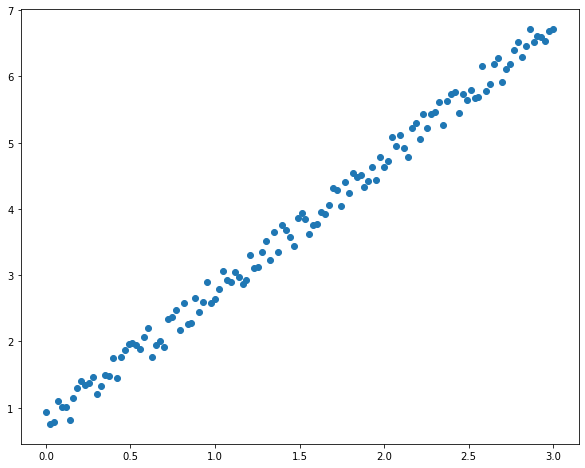

In [4]:
plt.figure(figsize=(10,8))
plt.scatter(x,y)
plt.show()

In [5]:
class LinearModel:
    def __init__(self):
        self.weight = tf.Variable(np.random.randn(),name='W')
        self.bias = tf.Variable(np.random.randn(),name='b')
    def __call__(self,x):
        return self.weight * x + self.bias

In [6]:
def loss(y,y_pred):
    return tf.reduce_mean(tf.square( y - y_pred))

In [7]:
def train(linear_model, x, y, lr=0.01):
    with tf.GradientTape() as tape:
        y_pred = linear_model(x)
        
        current_loss = loss(y,y_pred)
    
    d_weight ,d_bias = tape.gradient(current_loss,[linear_model.weight,linear_model.bias])
    
    linear_model.weight.assign_sub(lr * d_weight)
    linear_model.bias.assign_sub(lr * d_bias)

In [8]:
linear_model = LinearModel()
weights,biases = [],[]
epoch = 20
lr = 0.15

for epoch_count in range(epoch):
    weights.append(linear_model.weight.numpy())
    biases.append(linear_model.bias.numpy())
    
    real_loss = loss(y,linear_model(x))
    
    train(linear_model,x,y,lr=lr)
    print(f"for epoch count {epoch_count}: loss value: {real_loss.numpy()}")

for epoch count 0: loss value: 10.22392463684082
for epoch count 1: loss value: 0.2858208417892456
for epoch count 2: loss value: 0.07476267218589783
for epoch count 3: loss value: 0.06486568599939346
for epoch count 4: loss value: 0.059758950024843216
for epoch count 5: loss value: 0.05532106012105942
for epoch count 6: loss value: 0.0514007993042469
for epoch count 7: loss value: 0.04793647676706314
for epoch count 8: loss value: 0.044875018298625946
for epoch count 9: loss value: 0.04216957092285156
for epoch count 10: loss value: 0.03977876156568527
for epoch count 11: loss value: 0.0376659631729126
for epoch count 12: loss value: 0.03579888120293617
for epoch count 13: loss value: 0.03414890170097351
for epoch count 14: loss value: 0.03269079700112343
for epoch count 15: loss value: 0.03140230104327202
for epoch count 16: loss value: 0.030263617634773254
for epoch count 17: loss value: 0.02925734408199787
for epoch count 18: loss value: 0.028368109837174416
for epoch count 19: los

In [9]:
linear_model.weight.numpy(),linear_model.bias.numpy()

(2.0616896, 0.64202315)

In [10]:
rmse = loss(y,linear_model(x))
rmse.numpy()

0.026887817

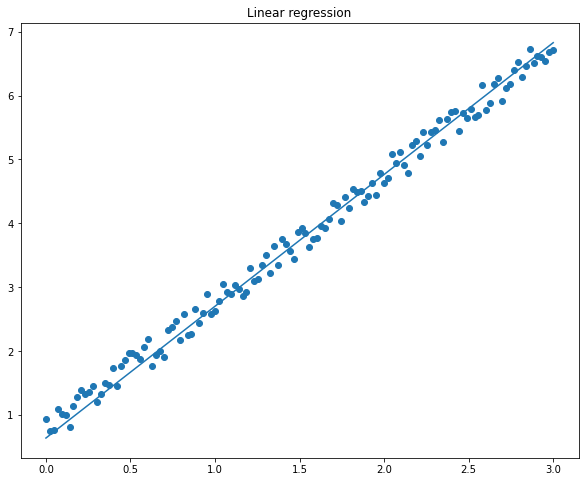

In [11]:
plt.figure(figsize=(10,8))
plt.scatter(x,y,label='original data')
plt.plot(x,linear_model(x),label='fitted line')
plt.title('Linear regression')
plt.show()